In [53]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [54]:
march4_1 = pd.read_csv('./pasco-data-march4/march4-1.csv')
march4_2 = pd.read_csv('./pasco-data-march4/march4-2.csv')
march4_3 = pd.read_csv('./pasco-data-march4/march4-3.csv')
march4_4 = pd.read_csv('./pasco-data-march4/march4-4.csv')

In [16]:
march4_4.head()

,Date and Time Run #1,Time (s) Run #1,Position (m) Run #1,Force (N) Run #1,Speed (mm/min) Run #1,Date and Time Run #2,Time (s) Run #2,Position (m) Run #2,Force (N) Run #2,Speed (mm/min) Run #2,...,Date and Time Run #5,Time (s) Run #5,Position (m) Run #5,Force (N) Run #5,Speed (mm/min) Run #5,Date and Time Run #6,Time (s) Run #6,Position (m) Run #6,Force (N) Run #6,Speed (mm/min) Run #6
0,03/04/2024 05:10:32 pm,0.0,0.0,0.0,NaN,03/04/2024 05:11:09 pm,0.0,0.0,0.0,NaN,...,03/04/2024 05:13:25 pm,0.0,0.0,0,NaN,03/04/2024 05:14:11 pm,0.0,0.0,0.0,NaN
1,03/04/2024 05:10:32 pm,0.1,0.0,0.0,0.0,03/04/2024 05:11:09 pm,0.1,0.0,0.0,0.0,...,03/04/2024 05:13:25 pm,0.1,0.0,0,0.0,03/04/2024 05:14:11 pm,0.1,0.0,0.0,0.0
2,03/04/2024 05:10:32 pm,0.2,0.0,0.0,0.0,03/04/2024 05:11:09 pm,0.2,0.0,0.0,0.0,...,03/04/2024 05:13:25 pm,0.2,0.0,0,0.0,03/04/2024 05:14:11 pm,0.2,0.0,0.0,0.0
3,03/04/2024 05:10:32 pm,0.3,0.0,0.0,0.0,03/04/2024 05:11:09 pm,0.3,0.0,1.0,0.0,...,03/04/2024 05:13:25 pm,0.3,0.0,0,0.0,03/04/2024 05:14:11 pm,0.3,0.0,0.0,0.0
4,03/04/2024 05:10:32 pm,0.4,0.0,0.0,0.0,03/04/2024 05:11:09 pm,0.4,0.0,0.0,0.0,...,03/04/2024 05:13:25 pm,0.4,0.0,0,0.0,03/04/2024 05:14:11 pm,0.4,0.0,0.0,0.0


In [106]:
rising_edge_1, prop = scipy.signal.find_peaks(march4_3['Force (N) Run #1'], height=2.5, plateau_size=3)
print(prop.get('right_edges'))

[ 89 155 251 295 302 330]


In [109]:
# find first rising edge
rising_edge_2 = (march4_3['Force (N) Run #2'].idxmin() - 89)/ 100 # convert to seconds, 10 Hz frequency
rising_edge_3 = (march4_3['Force (N) Run #3'].idxmin() - 89)/ 100
rising_edge_4 = (march4_3['Force (N) Run #4'].idxmin() - 89)/ 100
rising_edge_5 = (march4_3['Force (N) Run #5'].idxmin() - 89)/ 100

In [87]:
# process signal before plotting
y1_single = np.convolve(march4_3['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_single = np.convolve(march4_3['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_single = np.convolve(march4_3['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_single = np.convolve(march4_3['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_single = np.convolve(march4_3['Force (N) Run #5'], np.ones(5)/5, mode='same')
p1_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p2_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p3_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p4_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p5_single, _ = scipy.signal.find_peaks(y1_single, width=20)
print(p1_single)

[ 16  86 155 225 295 300]


/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/2445531010.py:7: PeakPropertyWarning: some peaks have a width of 0
  p1_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/2445531010.py:8: PeakPropertyWarning: some peaks have a width of 0
  p2_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/2445531010.py:9: PeakPropertyWarning: some peaks have a width of 0
  p3_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/2445531010.py:10: PeakPropertyWarning: some peaks have a width of 0
  p4_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/2445531010.py:11: PeakPropertyWarning: some peaks have a width of 0
  p5_single, _ = scipy.signal.find_peaks(y1_single, width=20)


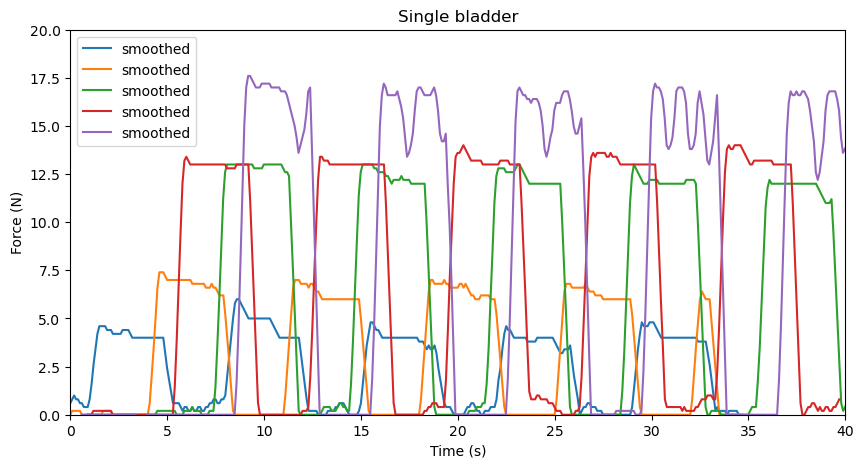

In [112]:
# plot single bladder data
plt.subplots(figsize=(10, 5))
# for i in range(5):
    # plt.plot(march4_3[f'Time (s) Run #{i+1}'], march4_3[f'Force (N) Run #{i+1}'], label=f'Run #{i+1}')
    # 50, 60, 70, 80, 90 PWM
plt.plot(march4_3['Time (s) Run #1'], y1_single, label='smoothed')
plt.plot(march4_3['Time (s) Run #2'], y2_single, label='smoothed')
plt.plot(march4_3['Time (s) Run #3'] - rising_edge_3, y3_single, label='smoothed')
plt.plot(march4_3['Time (s) Run #4'] - rising_edge_4, y4_single, label='smoothed')
plt.plot(march4_3['Time (s) Run #5'] - rising_edge_5, y5_single, label='smoothed')

plt.title('Single bladder')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.xlim(0, 40)
plt.ylim(0, 20)
plt.legend()
plt.show()

In [82]:
# process signal before plotting
# smooth data with moving average
y1_double = np.convolve(march4_4['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_double = np.convolve(march4_4['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_double = np.convolve(march4_4['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_double = np.convolve(march4_4['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_double = np.convolve(march4_4['Force (N) Run #5'], np.ones(5)/5, mode='same')
y6_double = np.convolve(march4_4['Force (N) Run #6'], np.ones(5)/5, mode='same')
p1_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p2_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p3_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p4_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p5_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p6_double, _ = scipy.signal.find_peaks(y1_double, width=20)

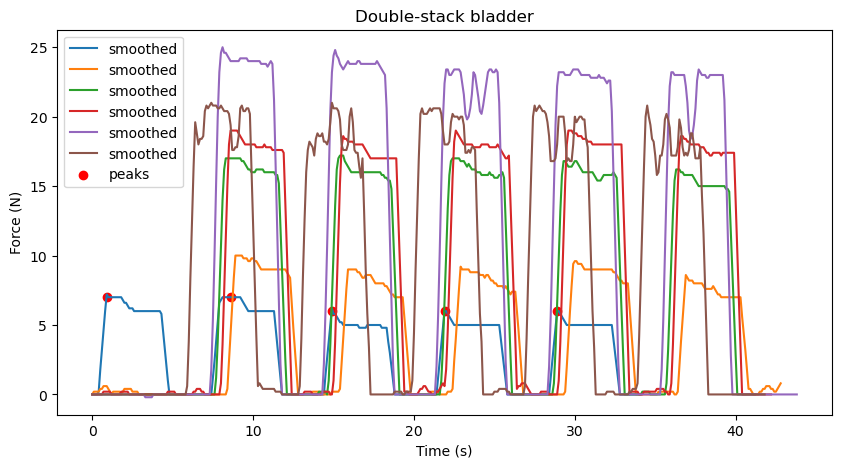

In [84]:
# plot double-stack bladder data
plt.subplots(figsize=(10, 5))
# for i in range(6):
    # plt.plot(march4_4[f'Time (s) Run #{i+1}'], march4_4[f'Force (N) Run #{i+1}'], label=f'Run #{i+1}')
    # 50, 60, 70, 80, 90, 100 PWM

plt.plot(march4_4['Time (s) Run #1'], y1_double, label='smoothed')
plt.plot(march4_4['Time (s) Run #2'], y2_double, label='smoothed')
plt.plot(march4_4['Time (s) Run #3'], y3_double, label='smoothed')
plt.plot(march4_4['Time (s) Run #4'], y4_double, label='smoothed')
plt.plot(march4_4['Time (s) Run #5'], y5_double, label='smoothed')
plt.plot(march4_4['Time (s) Run #6'], y6_double, label='smoothed')
plt.scatter(march4_4['Time (s) Run #1'][p1_double], march4_4['Force (N) Run #1'][p1_double], c='r', label='peaks')
plt.title('Double-stack bladder')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.show()